# Fig. S2: Strychnine

# import

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

# Load data

In [2]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE'

# Ctrl
with open(file_path+'/stry_dataset_c.pkl', 'rb') as handle:
    dict_c_stry = pickle.load(handle)
    
# Strychnine
with open(file_path+'/stry_dataset_stry.pkl', 'rb') as handle:
    dict_d_stry = pickle.load(handle)

# --------------------------------------------------------------------------------------------------------------------

# plot mean responses

In [3]:
print('# cells Strychnine: '+str(dict_d_stry['cell_type'].shape[0]))

# cells Strychnine: 436


In [4]:
# select types with n>3 cells
n_cells_per_group_stry = np.zeros(32)
for i in range(32):
    n_cells_per_group_stry[i] = np.where(dict_c_stry['cell_type']==i+1)[0].shape[0]
good_types = np.where(n_cells_per_group_stry>=3)[0]
good_types+=1
print(good_types)

[ 1  2  4  6  7 10 11 12 14 17 18 19 20 22 23 24 26 28 31 32]


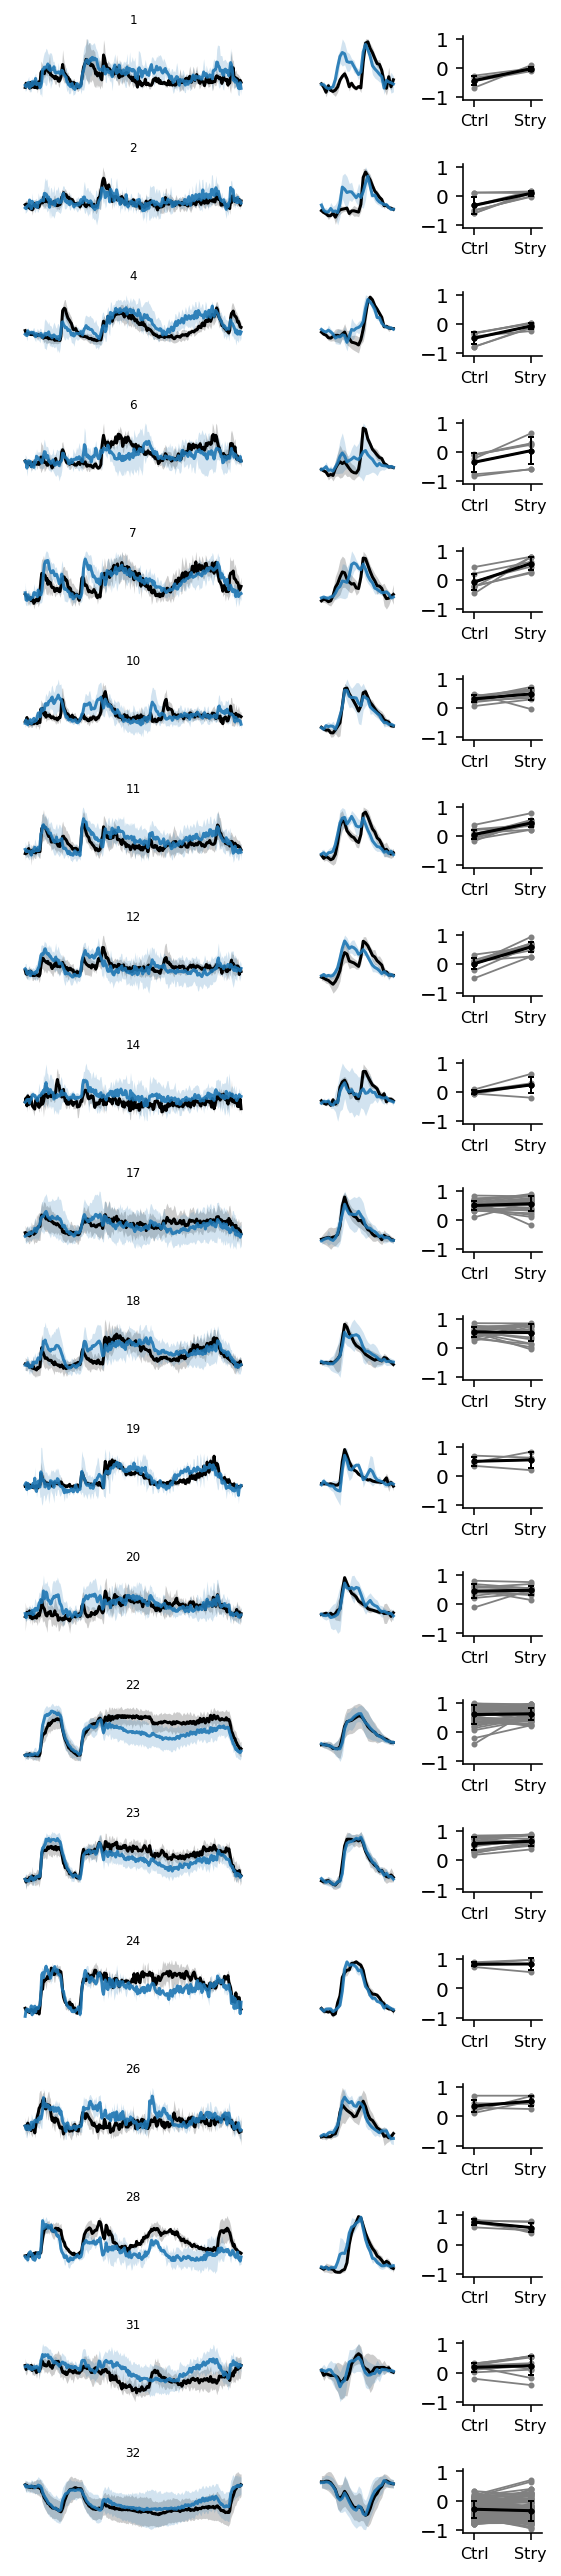

In [7]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels,fontsize=8)
    ax.set_xlim(0.8, len(labels) + 0.2)

linewidth=0.9
markersize=2
fontsize=8
label=['Ctrl','Stry']
lw=1.5
fig,ax=plt.subplots(len(good_types),3,figsize=(4,18),gridspec_kw={'width_ratios': [3, 1, 1]})

for i,j in enumerate(good_types):
    # Ctrl 1 (used to plot for all conditions)
    idx_ctrl = np.where(dict_c_stry['cell_type']==j)[0]
    mean_chirp_c1 = np.mean(dict_c_stry['chirp'][idx_ctrl,:],axis=0)
    std_chirp_c1 = np.std(dict_c_stry['chirp'][idx_ctrl,:],axis=0)
    mean_bar_c1 = np.mean(dict_c_stry['bar'][idx_ctrl,:],axis=0)
    std_bar_c1 = np.std(dict_c_stry['bar'][idx_ctrl,:],axis=0)
    
    idx_ctrl_stry = np.where(dict_d_stry['cell_type']==j)[0]
    mean_chirp_stry = np.mean(dict_d_stry['chirp'][idx_ctrl_stry,:],axis=0)
    std_chirp_stry = np.std(dict_d_stry['chirp'][idx_ctrl_stry,:],axis=0)     
    mean_bar_stry = np.mean(dict_d_stry['bar'][idx_ctrl_stry,:],axis=0)
    std_bar_stry = np.std(dict_d_stry['bar'][idx_ctrl_stry,:],axis=0)   
    
    
    ctrl_bar = dict_c_stry['bar'][idx_ctrl,:]
    stry_bar = dict_d_stry['bar'][idx_ctrl,:]
    pol_idx_ctrl = np.zeros(ctrl_bar.shape[0])
    pol_idx_stry = np.zeros(ctrl_bar.shape[0])
    
    for k in range(pol_idx_ctrl.shape[0]):
        a = np.mean(np.clip(np.diff(ctrl_bar[k,:16]),0,1))
        b = np.mean(np.clip(np.diff(ctrl_bar[k,16:]),0,1))
        pol_idx_ctrl[k] = (a-b)/(a+b)
        
        a = np.mean(np.clip(np.diff(stry_bar[k,:16]),0,1))
        b = np.mean(np.clip(np.diff(stry_bar[k,16:]),0,1))
        pol_idx_stry[k] = (a-b)/(a+b)

### Plotting    
    ### ctrl 1
    ax[i,0].plot(mean_chirp_c1,color='black',lw=lw)
    ax[i,0].fill_between(np.arange(0,249,1),mean_chirp_c1+std_chirp_c1,mean_chirp_c1-std_chirp_c1,alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
    ax[i,0].axis('off')    
    ax[i,1].plot(mean_bar_c1,color='black',lw=lw)
    ax[i,1].fill_between(np.arange(0,32,1),mean_bar_c1+std_bar_c1,mean_bar_c1-std_bar_c1,alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
    ax[i,1].axis('off') 
    # strychnine
    ax[i,0].plot(mean_chirp_stry,color='tab:blue',lw=lw,alpha=.9)
    ax[i,0].fill_between(np.arange(0,249,1),mean_chirp_stry+std_chirp_stry,mean_chirp_stry-std_chirp_stry,alpha=0.2,color='tab:blue',edgecolor="b", linewidth=0.0)
    ax[i,0].axis('off')    
    ax[i,1].plot(mean_bar_stry,color='tab:blue',lw=lw,alpha=.9)
    ax[i,1].fill_between(np.arange(0,32,1),mean_bar_stry+std_bar_stry,mean_bar_stry-std_bar_stry,alpha=0.2,color='tab:blue',edgecolor="b", linewidth=0.0)
    ax[i,1].axis('off')         
    ax[i,0].set_title(str(good_types[i]),fontsize=6)
    
### Plotting    
    
    # polarity index
    pos=[1,2];
    temp=np.zeros(2);
    for k in range(0,pol_idx_ctrl.shape[0]):                     
        temp[0] = pol_idx_ctrl[k]
        temp[1] = pol_idx_stry[k]
        ax[i,2].scatter(pos,temp,linewidth=linewidth,color='gray',s=markersize)
        ax[i,2].plot(pos,temp,'o-',markersize=markersize,color='gray',linewidth=linewidth)
    temp[0] = np.mean(pol_idx_ctrl)
    temp[1] = np.mean(pol_idx_stry)
    ax[i,2].scatter(pos,temp,linewidth=linewidth,color='black',s=markersize)
    ax[i,2].plot(pos,temp,'o-',color='black',markersize=markersize,linewidth=linewidth)    
    for ax0 in [ax[i,2]]:
        set_axis_style(ax0, label)    
    ax[i,2].set_ylim(-1.1,1.1)
    ax[i,2].errorbar(pos,[np.mean(pol_idx_ctrl),np.mean(pol_idx_stry)],yerr=[np.std(pol_idx_ctrl),np.std(pol_idx_stry)], capsize=1.5, color='black', marker= 'o',ms=markersize,zorder=6,elinewidth=1)
    
sns.despine()
fig.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=1)

# --------------------------------------------------------------------------------------------------------------------

# Statistics

In [10]:
p_value_ttest = np.zeros(len(good_types))
p_value_wilcoxon = np.zeros(len(good_types))
p_value_shapiro_ctrl = np.zeros(len(good_types))
p_value_shapiro_stry = np.zeros(len(good_types))
p_values_tests = np.zeros(len(good_types))

for i,j in enumerate(good_types):
    idx_ctrl = np.where(dict_c_stry['cell_type']==j)[0]
    ctrl_bar = dict_c_stry['bar'][idx_ctrl,:]
    stry_bar = dict_d_stry['bar'][idx_ctrl,:]
    pol_idx_ctrl = np.zeros(ctrl_bar.shape[0])
    pol_idx_stry = np.zeros(ctrl_bar.shape[0])
    
    for k in range(pol_idx_ctrl.shape[0]):
        a = np.mean(np.clip(np.diff(ctrl_bar[k,:16]),0,1))
        b = np.mean(np.clip(np.diff(ctrl_bar[k,16:]),0,1))
        pol_idx_ctrl[k] = (a-b)/(a+b)
        
        a = np.mean(np.clip(np.diff(stry_bar[k,:16]),0,1))
        b = np.mean(np.clip(np.diff(stry_bar[k,16:]),0,1))
        pol_idx_stry[k] = (a-b)/(a+b)
     
    p_value_shapiro_ctrl[i] = stats.shapiro(pol_idx_ctrl)[1]
    p_value_shapiro_stry[i] = stats.shapiro(pol_idx_stry)[1]
    
    p_value_ttest[i] = stats.ttest_rel(pol_idx_ctrl, pol_idx_stry)[1]
    p_value_wilcoxon[i] = stats.wilcoxon(pol_idx_ctrl, pol_idx_stry)[1]
    
    if (p_value_shapiro_ctrl[i]>0.05) and (p_value_shapiro_stry[i]>0.05):
        p_values_tests[i] = p_value_ttest[i]
    else:
        p_values_tests[i] = p_value_wilcoxon[i]

/gpfs01/euler/User/dgonschorek/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [13]:
for i,j in enumerate(good_types):
    print('RGC type: '+str(good_types[i])+' p-value: '+str(p_values_tests[i]))

RGC type: 1 p-value: 0.0450581261939186
RGC type: 2 p-value: 0.027991815485665747
RGC type: 4 p-value: 0.027707849358079864
RGC type: 6 p-value: 0.027707849358079864
RGC type: 7 p-value: 0.003008533788308031
RGC type: 10 p-value: 0.06829641275922962
RGC type: 11 p-value: 1.3856518580087811e-05
RGC type: 12 p-value: 0.0033456181158508813
RGC type: 14 p-value: 0.17635358719053337
RGC type: 17 p-value: 0.05165174631921652
RGC type: 18 p-value: 0.6474707129373445
RGC type: 19 p-value: 0.7837543776617888
RGC type: 20 p-value: 0.7657678219703388
RGC type: 22 p-value: 0.5115395522282624
RGC type: 23 p-value: 0.1208386531141816
RGC type: 24 p-value: 1.0
RGC type: 26 p-value: 0.2318561336685908
RGC type: 28 p-value: 0.09108996717593718
RGC type: 31 p-value: 0.3862707203664827
RGC type: 32 p-value: 0.09896594110964495


In [14]:
for i,j in enumerate(good_types):
    if p_values_tests[i]<0.0001:
        print('RGC type: '+str(good_types[i])+' p-value: '+str(p_values_tests[i])+' ****')
    elif p_values_tests[i]<0.001:
        print('RGC type: '+str(good_types[i])+' p-value: '+str(p_values_tests[i])+' ***')
    elif p_values_tests[i]<0.01:
        print('RGC type: '+str(good_types[i])+' p-value: '+str(p_values_tests[i])+' **')
    elif p_values_tests[i]<0.05:
        print('RGC type: '+str(good_types[i])+' p-value: '+str(p_values_tests[i])+' *')

RGC type: 1 p-value: 0.0450581261939186 *
RGC type: 2 p-value: 0.027991815485665747 *
RGC type: 4 p-value: 0.027707849358079864 *
RGC type: 6 p-value: 0.027707849358079864 *
RGC type: 7 p-value: 0.003008533788308031 **
RGC type: 11 p-value: 1.3856518580087811e-05 ****
RGC type: 12 p-value: 0.0033456181158508813 **
